In [1]:
# pip install opencv-python # to use the cv2

In [2]:
import numpy as np
import gym
import gym_sokoban
import matplotlib.pyplot as plt
from custom_sokoban_env import my_sokoban_env
import sokoban_tabular
import time
import sys
import random 
import itertools
import cv2
from dqn import train_dqn

# Check System Requirements

In [3]:
# pip install gym==0.21.0

In [4]:
print(gym.__version__)

0.21.0


In [5]:
print(sys.version)

3.9.17 (main, Jul  5 2023, 21:22:06) [MSC v.1916 64 bit (AMD64)]


# Define the environment and number of boxes

In [6]:
# # Create the Sokoban environment from sokoban versions.
# env_name = 'Sokoban-v2'
# game_env = gym.make(env_name)

In [7]:
# Create the Sokoban environment custom
# game_env = my_sokoban_env(dim_room=(10, 10), num_boxes=3)

In [8]:
# Function to convert state to a tuple
def state_to_tuple(state):
    return tuple(state.reshape(-1))

# Save the original state of the environment
# initial_state = game_env.reset()
# initial_state_tuple = state_to_tuple(initial_state)
# game_env.render(mode='human')

In [9]:
# Action lookup
# ACTION_LOOKUP = env.unwrapped.get_action_lookup()
# Convert state to tuple representation (for tabular SARSA)
def state_to_tuple(state):
    return tuple(state.ravel())

# Save One Initial State for Consistancy

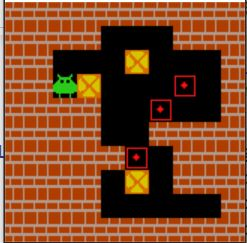

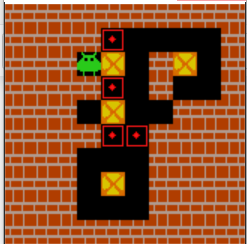

In [10]:
# # We need to save the exact one we see below so comment this when selected the desired env topology
# initial_agent_position = game_env.player_position
# initial_box_mapping = game_env.box_mapping
# initial_room_fixed = game_env.room_fixed
# initial_room_state = game_env.room_state

In [11]:
# 3 Box environment
initial_room_state = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                               [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
                               [0, 0, 1, 1, 1, 4, 1, 1, 1, 0],
                               [0, 0, 5, 4, 1, 1, 1, 2, 1, 0],
                               [0, 0, 0, 0, 1, 1, 2, 1, 1, 0],
                               [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
                               [0, 0, 0, 0, 0, 2, 1, 0, 0, 0],
                               [0, 0, 0, 0, 1, 4, 1, 0, 0, 0],
                               [0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
                               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

initial_room_fixed = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                               [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
                               [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
                               [0, 0, 1, 1, 1, 1, 1, 2, 1, 0],
                               [0, 0, 0, 0, 1, 1, 2, 1, 1, 0],
                               [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
                               [0, 0, 0, 0, 0, 2, 1, 0, 0, 0],
                               [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
                               [0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
                               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

initial_box_mapping = np.array({(3, 7): (7, 5), (4, 6): (3, 3), (6, 5): (2, 5)})

initial_agent_position = np.array([3,2])

In [12]:
# # 4 Box environment
# initial_room_state = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#        [0, 0, 0, 0, 2, 1, 1, 1, 1, 0],
#        [0, 0, 0, 5, 4, 1, 0, 4, 1, 0],
#        [0, 0, 0, 0, 2, 1, 0, 1, 1, 0],
#        [0, 0, 0, 1, 4, 1, 1, 0, 0, 0],
#        [0, 0, 0, 0, 2, 2, 0, 0, 0, 0],
#        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
#        [0, 0, 0, 1, 4, 1, 0, 0, 0, 0],
#        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# initial_room_fixed = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#        [0, 0, 0, 0, 2, 1, 1, 1, 1, 0],
#        [0, 0, 0, 1, 1, 1, 0, 1, 1, 0],
#        [0, 0, 0, 0, 2, 1, 0, 1, 1, 0],
#        [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
#        [0, 0, 0, 0, 2, 2, 0, 0, 0, 0],
#        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
#        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
#        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# initial_box_mapping = np.array({(1, 4): (2, 7), (3, 4): (4, 4), (5, 4): (7, 4), (5, 5): (2, 4)})

# initial_agent_position = np.array([2, 3])

In [13]:
game_env = my_sokoban_env(initial_agent_position=initial_agent_position,
                        initial_box_mapping=initial_box_mapping,
                        initial_room_fixed=initial_room_fixed,
                        initial_room_state=initial_room_state)

In [14]:
game_env.reset()
game_env.render(mode='human')

True

In [15]:
# pip install stable-baselines3 gym numpy torch torchvision

In [16]:
# pip install shimmy

In [17]:
# pip install tqdm

In [18]:
import gym
import numpy as np
import torch
import torch.nn as nn
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv
from tqdm import tqdm

from stable_baselines3.common.atari_wrappers import AtariWrapper
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.dqn import CnnPolicy

In [19]:
def train_sokoban():
    # Create the Sokoban environment
    env = my_sokoban_env(initial_agent_position=initial_agent_position,
                        initial_box_mapping=initial_box_mapping,
                        initial_room_fixed=initial_room_fixed,
                        initial_room_state=initial_room_state)

    # Wrap the environment with DummyVecEnv to support training with DQN
    env = DummyVecEnv([lambda: env])

    # Define and train the DQN model
    model = DQN("CnnPolicy", env, buffer_size=10000, verbose=1)

    # Use the modified second_reset function for resetting the environment
    model.set_env(env)
    model.learn(total_timesteps=100000)

    # Save the trained model
    model.save("sokoban_dqn_model")



In [ ]:
if __name__ == "__main__":
    train_sokoban()

C:\Users\lalep\anaconda3\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
Wrapping the env in a VecTransposeImage.
Wrapping the env in a VecTransposeImage.
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.954    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 64       |
|    time_elapsed     | 7        |
|    total_timesteps  | 480      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.909    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 71       |
|    time_elapsed     | 13       |
|    total_timesteps  | 960      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.863    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 75       |
|    time_elapsed     | 19       |
|    total_timesteps  | 14

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 108      |
|    fps              | 70       |
|    time_elapsed     | 184      |
|    total_timesteps  | 12960    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 112      |
|    fps              | 69       |
|    time_elapsed     | 192      |
|    total_timesteps  | 13440    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 116      |
|    fps              | 69       |
|    time_elapsed     | 201      |
|    total_timesteps  | 13920    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 216      |
|    fps              | 69       |
|    time_elapsed     | 370      |
|    total_timesteps  | 25920    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 220      |
|    fps              | 70       |
|    time_elapsed     | 376      |
|    total_timesteps  | 26400    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 70       |
|    time_elapsed     | 382      |
|    total_timesteps  | 26880    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 69       |
|    time_elapsed     | 562      |
|    total_timesteps  | 38880    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 68       |
|    time_elapsed     | 572      |
|    total_timesteps  | 39360    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 68       |
|    time_elapsed     | 578      |
|    total_timesteps  | 39840    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 428      |
|    fps              | 41       |
|    time_elapsed     | 1225     |
|    total_timesteps  | 51360    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000496 |
|    n_updates        | 339      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 432      |
|    fps              | 36       |
|    time_elapsed     | 1415     |
|    total_timesteps  | 51840    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000523 |
|    n_updates        | 459      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

**rollout/exploration_rate:** This is the current rate of exploration used by the agent. In the beginning, the agent needs to explore the environment to learn as much as possible. As the training progresses and the agent gets more familiar with the environment, it relies less on exploration and more on the knowledge it has already gained. The exploration rate usually starts high and decreases over time. The actual value (0.088) can be interpreted as the chance (8.8%) that the agent will take a random action instead of using the policy it has learned.

**ime/episodes:** This is the number of episodes that have been completed so far during training. An episode is one sequence of states, actions and rewards, which ends with a terminal state (e.g., the game is over). In this case, 8 episodes have been completed.

**time/fps:** This stands for frames per second, indicating how many steps are being processed per second in the environment. High fps leads to faster training. Here, it shows that your model is processing 90 steps per second.

**time/time_elapsed:** This is the total time (in seconds) that has elapsed since the training started. In this case, it's been 10 seconds.

**time/total_timesteps:** This is the total number of timesteps that have been processed so far. A timestep is one step in the environment, and it's not necessarily equivalent to a real-time second. Here, your model has processed a total of 960 timesteps since the beginning of training.

**train/learning_rate:** This is the learning rate used by the optimizer during the training of the DQN. The learning rate dictates how much the model parameters are updated in response to the observed error in each training step.

**train/loss:** This metric represents the value of the loss function, which the algorithm is trying to minimize. It's a measure of the difference between the model's predictions and the actual data. Lower values generally indicate better performance, although overfitting can occur if the loss becomes too low.

**train/n_updates:** This is the number of times the model has been updated during the training process. In the context of DQN, this would be the number of optimization steps taken.

In [ ]:
def test_sokoban(model, num_episodes=100):
    # Create the Sokoban environment
    env = my_sokoban_env(initial_agent_position=initial_agent_position,
                        initial_box_mapping=initial_box_mapping,
                        initial_room_fixed=initial_room_fixed,
                        initial_room_state=initial_room_state)

    for episode in range(num_episodes):
        obs = env.reset()
        done = False
        total_reward = 0

        while not done:
            # the model requires input of shape (num_parallel_envs, obs_dim)
            # so we expand the first dimension
            action, _ = model.predict(np.expand_dims(obs, axis=0))
            obs, reward, done, info = env.step(action[0])
            total_reward += reward
            
            
        print(f"Episode {episode + 1}: {total_reward}")
        
        env.render(mode='human')

if __name__ == "__main__":
    model = DQN.load("sokoban_dqn_model")
    test_sokoban(model)

In [ ]:
# Test the trained model
state = env.reset()
done = False
while not done:
    action, _ = dqn_model.predict(state)
    state, _, done, _ = env.step(action)
    env.render()